In [2]:
#Importing tensorflow and keras libraries
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [3]:
model1 = tf.keras.models.Sequential([
    
   tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(64, 64,3)),
   tf.keras.layers.MaxPooling2D(2, 2),
    
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
   tf.keras.layers.MaxPooling2D(2, 2),
    
   tf.keras.layers.Flatten(),
    
   tf.keras.layers.Dense(128, activation='relu'),
   
    tf.keras.layers.Dense(29, activation='softmax')
])

model1.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 6272)              0         
                                                                 
 dense (Dense)               (None, 128)               8

In [4]:
train_datagenerator = tf.keras.preprocessing.image.ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True,
                                    validation_split=0.2)




training_dataset = train_datagenerator.flow_from_directory('asl_alphabet_train/asl_alphabet_train',
                                                 target_size = (64, 64),  # the size of the images expected in my cnn model
                                                 batch_size = 32,
                                                subset = 'training',
                                                 class_mode = 'categorical')


validation_dataset = train_datagenerator.flow_from_directory('asl_alphabet_train/asl_alphabet_train',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            subset = 'validation',
                                            class_mode = 'categorical')

Found 69600 images belonging to 29 classes.
Found 17400 images belonging to 29 classes.


In [5]:
history1=model1.fit(training_dataset,
              epochs = 25,
              validation_data = validation_dataset)
model1.save_weights('weights1.h5')

Epoch 1/25
2175/2175 [==============================] - 1373s 630ms/step - loss: 1.3694 - accuracy: 0.5829 - val_loss: 1.9733 - val_accuracy: 0.4349
Epoch 2/25
2175/2175 [==============================] - 1307s 601ms/step - loss: 0.3917 - accuracy: 0.8702 - val_loss: 2.0092 - val_accuracy: 0.5157
Epoch 3/25
2175/2175 [==============================] - 1283s 590ms/step - loss: 0.2316 - accuracy: 0.9215 - val_loss: 1.7914 - val_accuracy: 0.5609
Epoch 4/25
2175/2175 [==============================] - 1588s 730ms/step - loss: 0.1664 - accuracy: 0.9431 - val_loss: 2.0602 - val_accuracy: 0.5812
Epoch 5/25
2175/2175 [==============================] - 1672s 769ms/step - loss: 0.1300 - accuracy: 0.9564 - val_loss: 2.0410 - val_accuracy: 0.6003
Epoch 6/25
2175/2175 [==============================] - 1219s 560ms/step - loss: 0.1091 - accuracy: 0.9630 - val_loss: 1.9900 - val_accuracy: 0.6225
Epoch 7/25
2175/2175 [==============================] - 886s 407ms/step - loss: 0.0970 - accuracy: 0.9682 

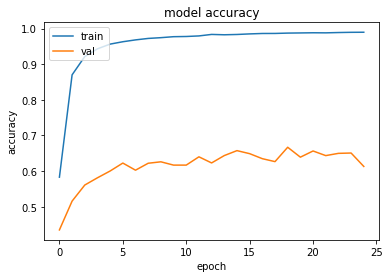

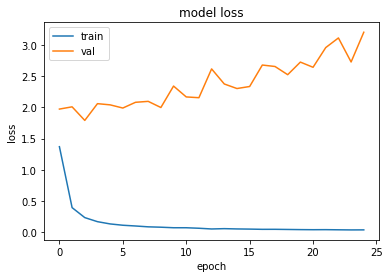

In [9]:
from matplotlib import pyplot as plt

plt.plot(history1.history['accuracy'])

plt.plot(history1.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()


plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [10]:
# Load weights of a pretrained model
test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale = 1./255,shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_set = test_datagen.flow_from_directory('asl_alphabet_test/asl_alphabet_test',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'categorical')


model1.load_weights("weights1.h5")

test_loss, test_acc = model1.evaluate(test_set)
print(test_acc)
print(test_loss)


Found 28 images belonging to 29 classes.
1/1 [==============================] - 0s 178ms/step - loss: 0.0952 - accuracy: 0.9643
0.9642857313156128
0.09515198320150375
